# Amazon Bestseller - Case Study


*********************************************
**************************
Dataset on Amazon's Top 50 bestselling books from 2009 to 2019. Contains 550 books, data has been categorized into fiction and non-fiction using Goodreads

Feature Details :

 * Name - Name / Title of the book.
 * Author - Author of the book.
 * User Rating - Rating of each book given by user out-of 5.
 * Reviews - Reviews given by the readers.
 * Price - Price of each book.
 * Year - Year in which book got published
 * Genre - Genre of book either it is Fiction or Non Fiction
 
**************************************
*******************************************

In [1]:
# Import related libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (
C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Load dataset using pd.read_csv since it is a CSV file
bestseller = pd.read_csv(r'E:\Function UP\Python\Projects\Amazon best seller\bestsellers with categories.csv')

In [3]:
bestseller.sample(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
91,Eat This Not That! Supermarket Survival Guide:...,David Zinczenko,4.5,720,1,2009,Non Fiction
275,Publication Manual of the American Psychologic...,American Psychological Association,4.5,8580,46,2013,Non Fiction
411,The Hunger Games Trilogy Boxed Set (1),Suzanne Collins,4.8,16949,30,2012,Fiction
432,"The Mark of Athena (Heroes of Olympus, Book 3)",Rick Riordan,4.8,6247,10,2012,Fiction
396,The Great Gatsby,F. Scott Fitzgerald,4.4,11616,7,2014,Fiction


In [4]:
# Make a copy of the Original dataet and use this copied dtaset for case study, so it's not effect the original dataset.
df = bestseller.copy()

In [5]:
# Lets check how many rows and columns are in the dataset
df.shape

(550, 7)

In [6]:
# Exploring a brife information about the dataset, gather insights from the same.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
#Return DataFrame with duplicate rows removed.
df.drop_duplicates()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [8]:
df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [9]:
df.describe(include='O')

,Name,Author,Genre
count,550,550,550
unique,351,248,2
top,Publication Manual of the American Psychologic...,Jeff Kinney,Non Fiction
freq,10,12,310


In [10]:
df.columns.tolist()

['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre']

In [11]:
# Check for how many unique values are present in each variables
print('Name - ', df['Name'].nunique())
print('Author - ', df['Author'].nunique())
print('User Rating - ', df['User Rating'].nunique())
print('Reviews - ', df['Reviews'].nunique())
print('Price - ', df['Price'].nunique())
print('Year - ', df['Year'].nunique())
print('Genre - ', df['Genre'].nunique())

Name -  351
Author -  248
User Rating -  14
Reviews -  346
Price -  40
Year -  11
Genre -  2


In [12]:
# Check for unique values are present in each variables to understand the datapoints
print('Name - ',set(df['Name']))
print('Author - ', set(df['Author']))
print('User Rating - ', set(df['User Rating']))
print('Reviews - ', set(df['Reviews']))
print('Price - ', set(df['Price']))
print('Year - ', set(df['Year']))
print('Genre - ', set(df['Genre']))

Name -  {'12 Rules for Life: An Antidote to Chaos', 'The President Is Missing: A Novel', 'Cabin Fever (Diary of a Wimpy Kid, Book 6)', 'Unicorn Coloring Book: For Kids Ages 4-8 (US Edition) (Silly Bear Coloring Books)', 'Cravings: Recipes for All the Food You Want to Eat: A Cookbook', 'The Power of Habit: Why We Do What We Do in Life and Business', 'Mockingjay (The Hunger Games)', 'Hillbilly Elegy: A Memoir of a Family and Culture in Crisis', 'Guts', 'Radical: Taking Back Your Faith from the American Dream', 'All the Light We Cannot See', 'Night (Night)', 'The Big Short: Inside the Doomsday Machine', 'Goodnight, Goodnight Construction Site (Hardcover Books for Toddlers, Preschool Books for Kids)', "The Time Traveler's Wife", 'The Guardians: A Novel', 'The Meltdown (Diary of a Wimpy Kid Book 13)', 'A Gentleman in Moscow: A Novel', 'Girl, Wash Your Face: Stop Believing the Lies About Who You Are So You Can Become Who You Were Meant to Be', "The Serpent's Shadow (The Kane Chronicles, Book

In [13]:
# Checking how many nullvalues are present in every feature of the dataset
print(df.isnull().sum()) # total number of nullvalues of every feature

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64


**************************
************************
# Observations :-

* No null values seen in the dataset
* We find that min price is zero and maximum parice as 150, there may be posiblity of outliers
* There are 351 unique books and 248 unique authors
* Total number of books are 65,74,305 and 2 genre - Friction and Non Friction
***********************

**************************
************************
# Questions :-

1. How many records are in the dataset?
2. What is the distribution of book genres?
3. Who are the top 5 authors with the most books in the dataset?
4. What is the average rating of the books in the dataset?
5. What is the average price of the books?
6. What is the range of years in which the books were published?
7. What are the top 5 most reviewed books?
8. What is the distribution of book ratings?
9. How many books have a rating greater than 4.5?
10. What is the most common price range for books?
11. What is the average number of reviews for books in each genre?
12. How does the average price vary across different genres?
13. What is the relationship between the number of reviews and the rating of books?
14. What are the top 5 books with the highest ratings and the highest number of reviews?
15. How has the number of bestseller books published per year changed over time?

******************************
************************

1. How many records are in the dataset?

In [14]:
print(df.shape)

(550, 7)


In [15]:
print('There are ', df['Name'].count(), 'records in the dataset.')

There are  550 records in the dataset.


2. What is the distribution of book genres?

In [16]:
df_genres=df.copy()

In [17]:
#First drop the duplicate values from the data set
df_genres_new=df_genres.drop(['Price','Year'], axis=1).drop_duplicates()
df_genres_new

,Name,Author,User Rating,Reviews,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,Non Fiction
...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,Fiction


In [18]:
#Find how many unique values are in 'Genre' 
df_genres_new['Genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

In [19]:
#Find the count for each genre
df_genres_new = df_genres_new['Genre'].value_counts().reset_index()
df_genres_new

,Genre,count
0,Non Fiction,192
1,Fiction,160


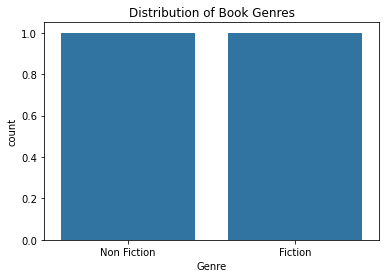

In [20]:
#Lets plot it in a graph
sns.countplot(data = df_genres_new, x = df_genres_new['Genre'])
plt.title('Distribution of Book Genres')
plt.show()

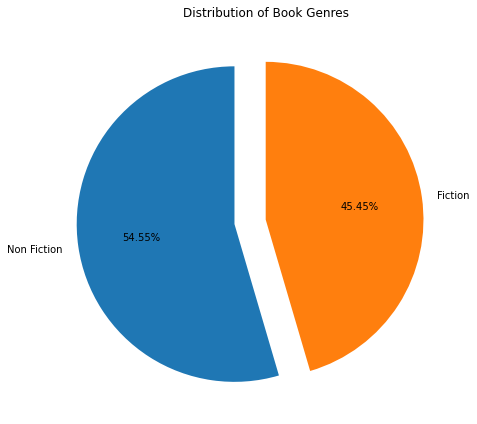

In [21]:
plt.figure(figsize=(12,6))

myexplode = [0.2, 0]
plt.pie(df_genres_new['count'], labels=df_genres_new['Genre'], autopct = '%0.2f%%',startangle = 90, explode = myexplode)

plt.title('Distribution of Book Genres')
plt.tight_layout()
plt.show()

3. Who are the top 5 authors with the most books in the dataset?

In [22]:
df_author=df.copy()

In [23]:
#First drop the duplicate values from the data set
df_author_new=df_author.drop(['Price','Year'], axis=1).drop_duplicates()
df_author_new

,Name,Author,User Rating,Reviews,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,Non Fiction
...,...,...,...,...,...
538,Winter of the World: Book Two of the Century T...,Ken Follett,4.5,10760,Fiction
539,Women Food and God: An Unexpected Path to Almo...,Geneen Roth,4.2,1302,Non Fiction
540,Wonder,R. J. Palacio,4.8,21625,Fiction
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,Fiction


In [24]:
# Group by 'Author' and count the number of books for each author
author_counts = df_author_new['Author'].value_counts().reset_index()
author_counts

,Author,count
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,Bill O'Reilly,6
4,Dav Pilkey,6
...,...,...
243,Eric Larson,1
244,Christopher Paolini,1
245,Jennifer Smith,1
246,Sarah Young,1


In [25]:
# Get the top 5 authors with the most books
top_5_authors = author_counts.head(5)
top_5_authors

,Author,count
0,Jeff Kinney,12
1,Rick Riordan,10
2,Stephenie Meyer,7
3,Bill O'Reilly,6
4,Dav Pilkey,6


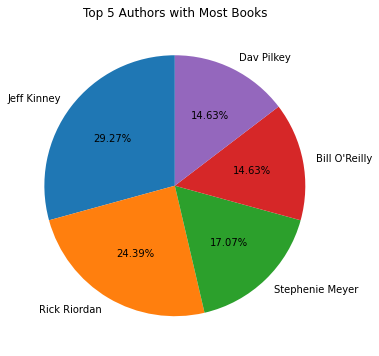

In [26]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
plt.pie(top_5_authors['count'], labels=top_5_authors['Author'], autopct = '%0.2f%%',startangle = 90)
plt.title('Top 5 Authors with Most Books')
plt.xticks(rotation=45)
plt.show()

4. What is the average rating of the books in the dataset?

In [27]:
# Calculate the average rating
average_rating = df['User Rating'].mean()
print('The average rating of the books in the dataset : ', round(average_rating,3))

The average rating of the books in the dataset :  4.618


5. What is the average price of the books?

In [28]:
df_price=df.copy()

In [29]:
df_price['Price'].describe()

count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [30]:
#Average_price before treating outliers
average_price = df_price['Price'].mean()
print('The average price of the books in the dataset : ', round(average_price,3))

The average price of the books in the dataset :  13.1


* Lets address the outliers in variable price

In [31]:
print(df_price['Price'].min())

0


In [32]:
print(df_price['Price'].max())

105


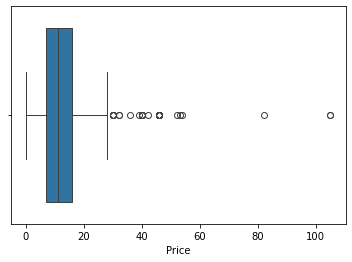

In [33]:
#here we can find the outliers
sns.boxplot(x=df_price['Price'])
plt.show()

While studying the boxplot we can spot some outliers in variable price so we need to use IQR Technique to deal with the outilers

*********
*********
Using IQR Technique

In [34]:
def iqr(DFcolumns):
        Q1 = np.percentile(DFcolumns, 25) #identify first quartile
        Q3 = np.percentile(DFcolumns, 75) #identfy third quartile
        
        IQR = Q3-Q1
        
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        
        return lower_range, upper_range

In [35]:
lower_range,upper_range = iqr(df_price['Price'])
df_price = df_price[(df_price.Price > lower_range) & (df_price.Price < upper_range)]

(519, 7)


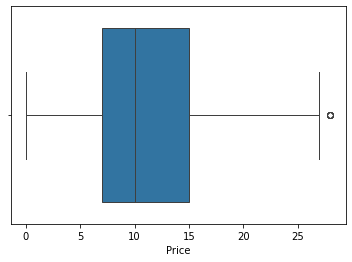

In [36]:
sns.boxplot(x=df_price['Price'])
print(df_price.shape)

In [37]:
print(df_price['Price'].min())

0


In [38]:
print(df_price['Price'].max())

28


In [39]:
#Average_price after treating outliers
average_price = df_price['Price'].mean()
print('The average price of the books in the dataset : ', round(average_price,3))

The average price of the books in the dataset :  11.104


6. What is the range of years in which the books were published?


In [40]:
print(f'The range of year id from ', df['Year'].min(), 'to ', df['Year'].max(), 'in which books are published.')

The range of year id from  2009 to  2019 in which books are published.


7. What are the top 5 most reviewed books?

In [41]:
top5 = df.groupby('Name')['Reviews'].sum().sort_values(ascending=False).head(5).reset_index()
top5

,Name,Reviews
0,The Fault in Our Stars,201928
1,"Oh, the Places You'll Go!",174672
2,Gone Girl,171813
3,The Girl on the Train,158892
4,"Unbroken: A World War II Story of Survival, Re...",148365


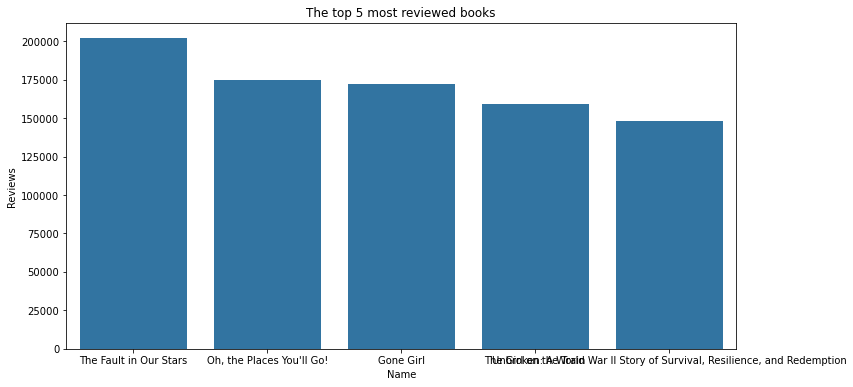

In [42]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top5, x='Name', y='Reviews')
plt.title('The top 5 most reviewed books')
plt.show()

8. What is the distribution of book ratings?


In [43]:
rating = df['User Rating'].value_counts().reset_index()
rating

,User Rating,count
0,4.8,127
1,4.7,108
2,4.6,105
3,4.5,60
4,4.9,52
5,4.4,38
6,4.3,25
7,4.0,14
8,4.2,8
9,4.1,6


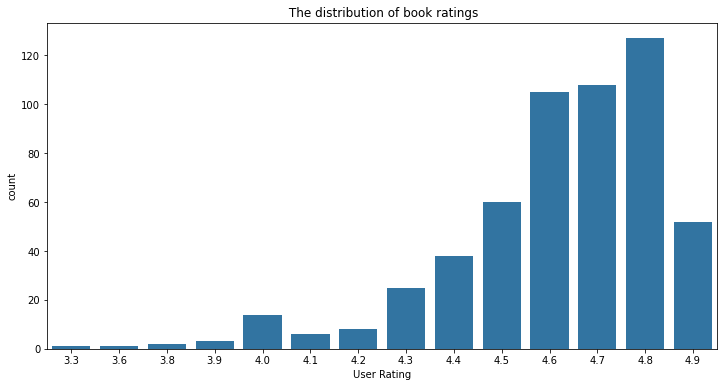

In [44]:
plt.figure(figsize=(12, 6))
sns.barplot(data=rating,x='User Rating', y='count')
plt.title(' The distribution of book ratings')
plt.show()

9. How many books have a rating greater than 4.5?


In [45]:
df_rating = df[df['User Rating'] > 4.5]
df_rating

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


In [46]:
df_rating.shape[0]

392

10. What is the most common price range for books?

In [47]:
q1 = np.percentile(df['Price'], 25) #identify first quartile
q3 = np.percentile(df['Price'], 75) #identfy third quartile

In [48]:
print(f'The most common price range for books is between ',q1 , 'and', q3)

The most common price range for books is between  7.0 and 16.0


11. What is the average number of reviews for books in each genre?


In [49]:
df_review=df.copy()

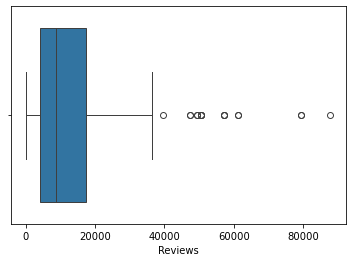

In [50]:
#here we can find the outliers
sns.boxplot(x=df_review['Reviews'])
plt.show()

While studying the boxplot we can spot some outliers in variable price so we need to use IQR Technique to deal with the outilers

*********
*********
Using IQR Technique

In [51]:
def iqr(DFcolumns):
        Q1 = np.percentile(DFcolumns, 25) #identify first quartile
        Q3 = np.percentile(DFcolumns, 75) #identfy third quartile
        
        IQR = Q3-Q1
        
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        
        return lower_range, upper_range

In [52]:
lower_range,upper_range = iqr(df_review['Reviews'])
df_review = df_review[(df_review.Reviews > lower_range) & (df_review.Reviews < upper_range)]

In [53]:
df_review['Reviews'] = np.log(df_review['Reviews'])

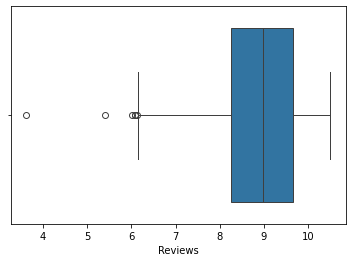

In [54]:
#here we can find the outliers
sns.boxplot(x=df_review['Reviews'])
plt.show()

In [55]:
avg_num=df_review.groupby('Genre')['Reviews'].mean().round(2).reset_index()
avg_num

,Genre,Reviews
0,Fiction,9.19
1,Non Fiction,8.65


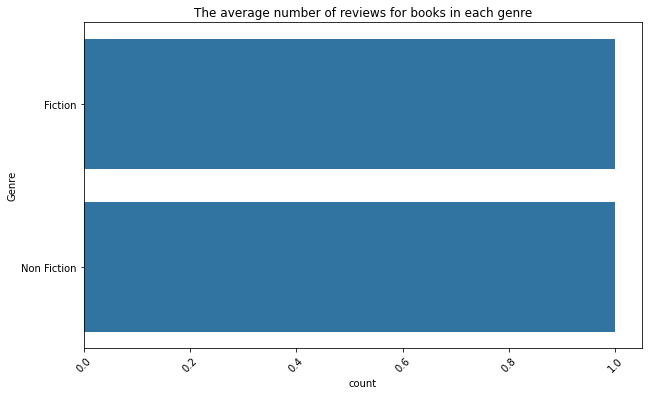

In [56]:
# Plot using matplotlib
plt.figure(figsize=(10, 6))
sns.countplot(avg_num['Genre'])
plt.title('The average number of reviews for books in each genre')
plt.xticks(rotation=45)
plt.show()

12. How does the average price vary across different genres?


In [57]:
df_price=df.copy()

(550, 7)


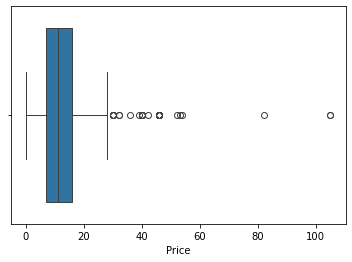

In [58]:
sns.boxplot(x=df_price['Price'])
print(df_price.shape)

In [59]:
def iqr(DFcolumns):
        Q1 = np.percentile(DFcolumns, 25) #identify first quartile
        Q3 = np.percentile(DFcolumns, 75) #identfy third quartile
        
        IQR = Q3-Q1
        
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        
        return lower_range, upper_range

In [60]:
lower_range,upper_range = iqr(df_price['Price'])
df_price = df_price[(df_price.Price > lower_range) & (df_price.Price < upper_range)]

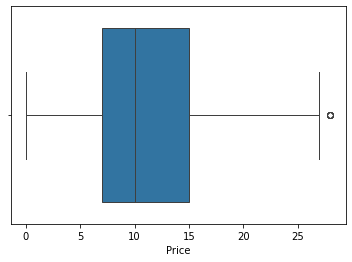

In [61]:
sns.boxplot(x=df_price['Price'])
plt.show()

In [62]:
avg_num=df_review.groupby('Genre')['Price'].mean().round(2).reset_index()
avg_num

,Genre,Price
0,Fiction,10.80
1,Non Fiction,14.87


13. What is the relationship between the number of reviews and the rating of books?

In [65]:
#sns.jointplot(data=df,x='Reviews',y='User Rating',kind='reg')

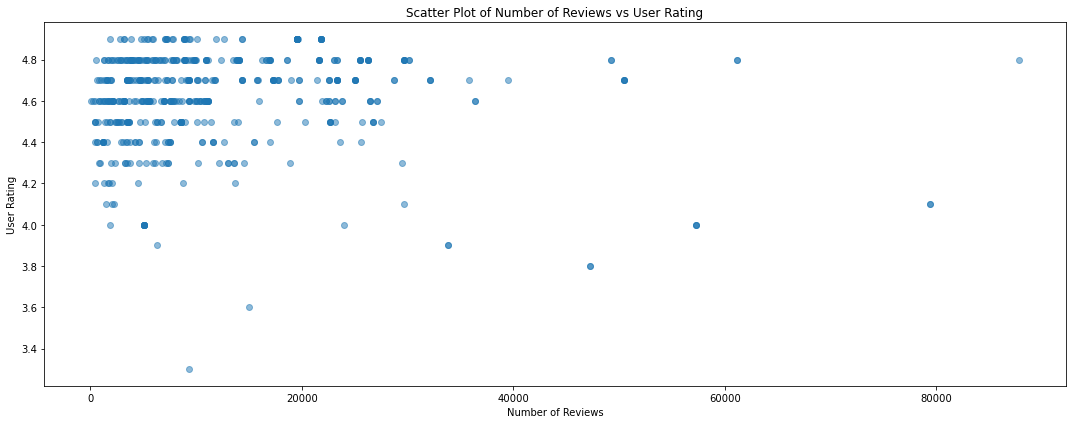

In [64]:
plt.figure(figsize=(15, 6))


# Create a scatter plot
plt.scatter(df['Reviews'], df['User Rating'], alpha=0.5)
plt.xlabel('Number of Reviews')
plt.ylabel('User Rating')
plt.title('Scatter Plot of Number of Reviews vs User Rating')

plt.tight_layout()
plt.show()

14. What are the top 5 books with the highest ratings and the highest number of reviews?


In [66]:
df.groupby(['Name','Author']).agg({'Reviews':'sum','User Rating':'max'}).sort_values(by=['User Rating','Reviews'],ascending=[False,False]).head(5)

,,Reviews,User Rating
Name,Author,,
"Oh, the Places You'll Go!",Dr. Seuss,174672,4.9
The Very Hungry Caterpillar,Eric Carle,136822,4.9
Jesus Calling: Enjoying Peace in His Presence (with Scripture References),Sarah Young,117456,4.9
The Wonderful Things You Will Be,Emily Winfield Martin,35368,4.9
"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,28688,4.9


15. How has the number of bestseller books published per year changed over time?

In [67]:
df['Publication Year'] = pd.to_datetime(df['Year'], format='%Y').dt.year

bestsellers_per_year = df.groupby('Publication Year').agg({'Name':'count'})
bestsellers_per_year

,Name
Publication Year,
2009,50
2010,50
2011,50
2012,50
2013,50
2014,50
2015,50
2016,50
2017,50
